In [1]:
# Hasan F. Durkaya 504241526

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Computing ythe least squares regression line parameters.

def compute_least_squares(x, y):

    n = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    
    # Calculating slope
    numerator = np.sum((x - x_mean) * (y - y_mean))
    denominator = np.sum((x - x_mean) ** 2)
    slope = numerator / denominator
    
    # Calculating intercept
    intercept = y_mean - slope * x_mean
    
    return slope, intercept

In [3]:
#Plot data points and regression line.
def plot_regression(ax, x, y, title):
    
    # Plotting the scatter points
    ax.scatter(x, y, color='blue', label='Data points')
    
    # Computing and plotişng regression line
    slope, intercept = compute_least_squares(x, y)
    x_line = np.array([min(x), max(x)])
    y_line = slope * x_line + intercept
    ax.plot(x_line, y_line, color='red', label=f'y = {slope:.2f}x + {intercept:.2f}')
    
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

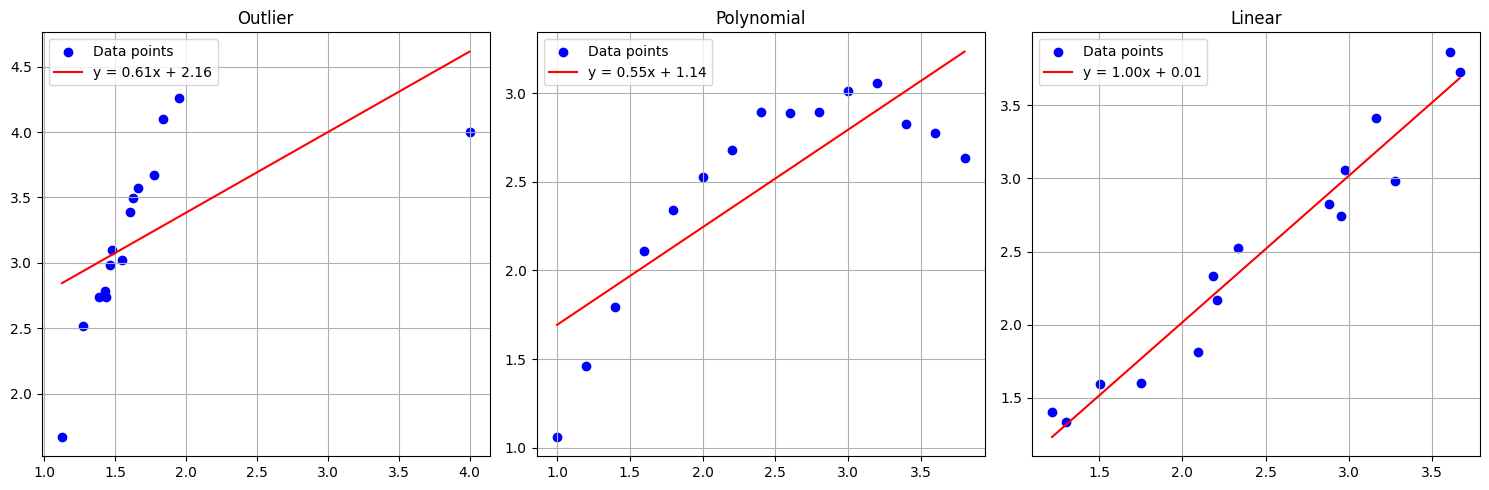

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Reading data from CSV files
outlier_df = pd.read_csv('outlier.csv')
poly_df = pd.read_csv('poly.csv')
linear_df = pd.read_csv('linear.csv')

# Ploting each dataset
plot_regression(ax1, outlier_df['x:'], outlier_df['y'], 'Outlier')
plot_regression(ax2, poly_df['x:'], poly_df['y'], 'Polynomial')
plot_regression(ax3, linear_df['x:'], linear_df['y'], 'Linear')

# Adjusting layout and display
plt.tight_layout()
plt.show()

In [5]:
# Polynomial Regression Features

def create_polynomial_features(x, degree):
    X = np.ones((len(x), degree + 1))
    for i in range(1, degree + 1):
        X[:, i] = x ** i
        
    return X

#Polynomial regression using normal equation."""
def fit_polynomial(X, y):
    return np.linalg.pinv(X.T @ X) @ X.T @ y

#Make predictions using polynomial coefficients.
def predict_polynomial(X, coefficients):
    return X @ coefficients

# MSE calculation
def calculate_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [6]:
def create_folds(n_samples, n_folds=5):
    
    # Create random permutation of indices
    indices = np.random.permutation(n_samples)
    fold_sizes = np.full(n_folds, n_samples // n_folds, dtype=int)
    fold_sizes[:n_samples % n_folds] += 1
    current = 0
    folds = []
    
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]])
        folds.append((train_idx, val_idx))
        current = stop
    
    return folds

def cross_validate_polynomial(x, y, degree, n_folds=5):
    
    folds = create_folds(len(x), n_folds)
    train_mse_scores = []
    val_mse_scores = []
    
    for train_idx, val_idx in folds:
        # Splitting the data
        x_train, x_val = x[train_idx], x[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Creating polynomial features
        X_train = create_polynomial_features(x_train, degree)
        X_val = create_polynomial_features(x_val, degree)
        
        # Predictions
        coefficients = fit_polynomial(X_train, y_train)
        y_train_pred = predict_polynomial(X_train, coefficients)
        y_val_pred = predict_polynomial(X_val, coefficients)
        
        # Calculating the MSEs
        train_mse = calculate_mse(y_train, y_train_pred)
        val_mse = calculate_mse(y_val, y_val_pred)
        
        train_mse_scores.append(train_mse)
        val_mse_scores.append(val_mse)
    
    return np.mean(train_mse_scores), np.mean(val_mse_scores)


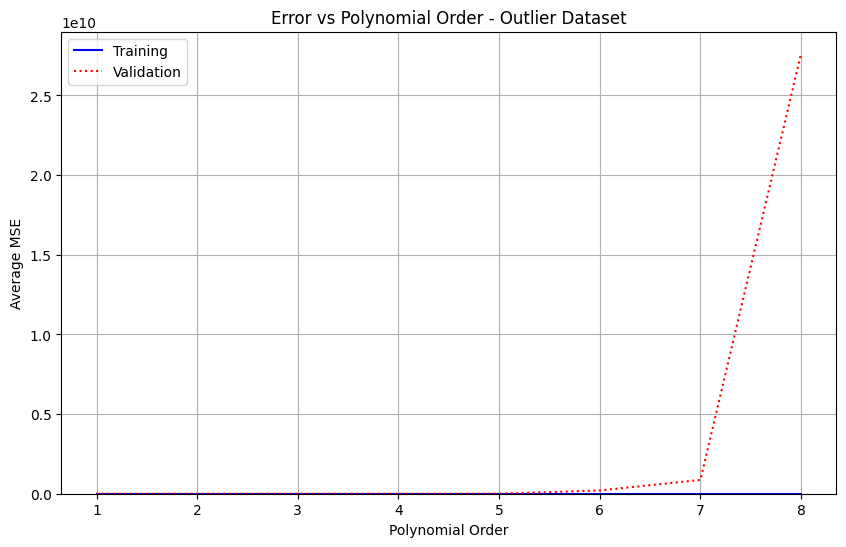


Results for Outlier Dataset:
Best polynomial order: 2
Minimum validation MSE: 0.1048


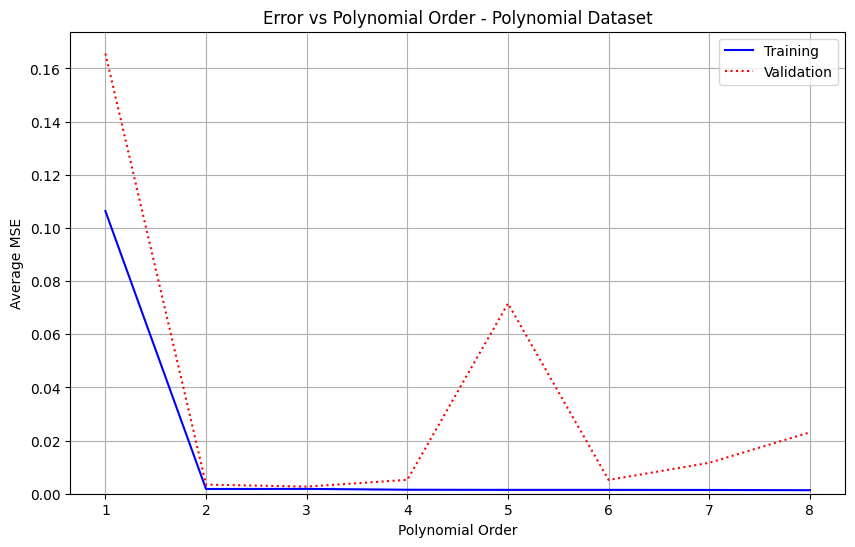


Results for Polynomial Dataset:
Best polynomial order: 3
Minimum validation MSE: 0.0027


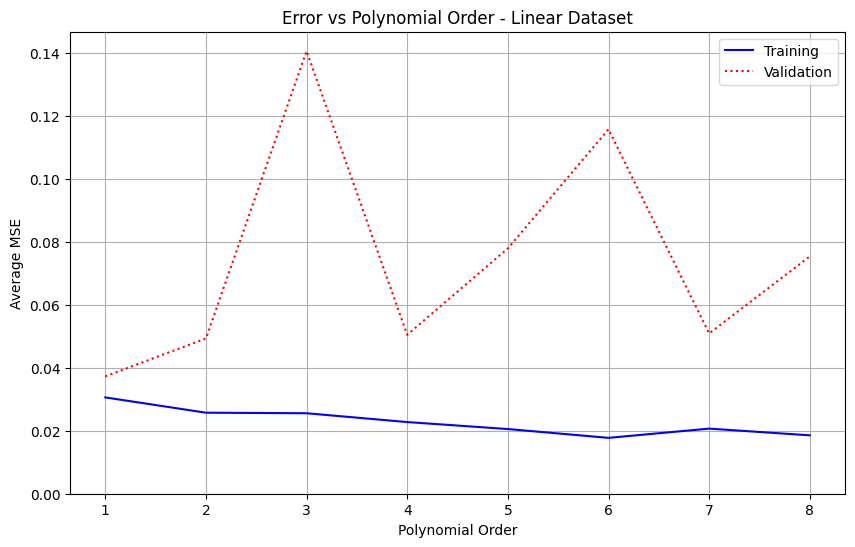


Results for Linear Dataset:
Best polynomial order: 1
Minimum validation MSE: 0.0373


In [7]:
def analyze_dataset(x, y, dataset_name):
    
    np.random.seed(42)
    orders = range(1, 9)
    train_mse_means = []
    val_mse_means = []
    
    for order in orders:
        train_mse, val_mse = cross_validate_polynomial(x, y, order)
        train_mse_means.append(train_mse)
        val_mse_means.append(val_mse)
    
    # Ploting results
    plt.figure(figsize=(10, 6))
    plt.plot(orders, train_mse_means, 'b-', label='Training')
    plt.plot(orders, val_mse_means, 'r:', label='Validation')
    plt.xlabel('Polynomial Order')
    plt.ylabel('Average MSE')
    plt.title(f'Error vs Polynomial Order - {dataset_name}')
    plt.legend()
    plt.grid(True)
    plt.xticks(orders)
    plt.ylim(bottom=0)
    plt.show()
    
    # Finding best polynomial order
    best_order = orders[np.argmin(val_mse_means)]
    print(f"\nResults for {dataset_name}:")
    print(f"Best polynomial order: {best_order}")
    print(f"Minimum validation MSE: {min(val_mse_means):.4f}")
    
    return train_mse_means, val_mse_means

#Datasets
outlier_df = pd.read_csv('outlier.csv')
poly_df = pd.read_csv('poly.csv')
linear_df = pd.read_csv('linear.csv')

datasets = [
    (outlier_df, 'Outlier Dataset'),
    (poly_df, 'Polynomial Dataset'),
    (linear_df, 'Linear Dataset')
]

for df, name in datasets:
    x = df['x:'].values
    y = df['y'].values
    analyze_dataset(x, y, name)